# Multiple Linear Regression

## Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Encoding categorical data

In [3]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder="passthrough")
x = np.array(ct.fit_transform(x))

In [6]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

## Training the Multiple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
# Display model summary information
print("Model Summary")
print("====================")
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
print(f"R-squared score: {regressor.score(X_test, y_test)}")


Model Summary
Coefficients: [-2.85e+02  2.98e+02 -1.24e+01  7.74e-01 -9.44e-03  2.89e-02]
Intercept: 49834.88507320514
R-squared score: 0.9649618042060807


## Predicting the Test set results

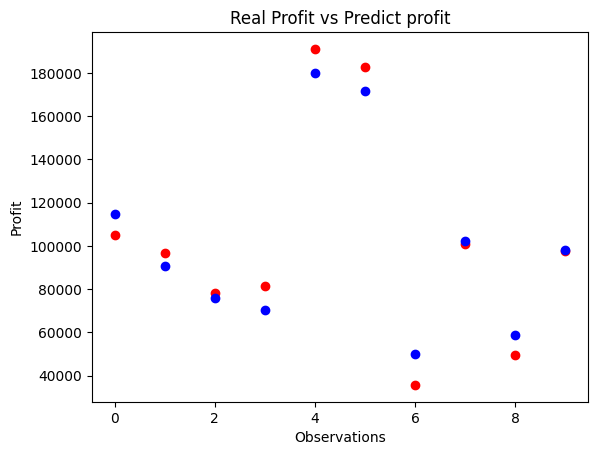

In [13]:
plt.scatter(x=range(0,len(X_test)),y=y_test,color='red')
plt.scatter(x=range(0,len(X_test)),y=regressor.predict(X_test),color='blue')
plt.title("Real Profit vs Predict profit")
plt.xlabel("Observations")
plt.ylabel("Profit")
plt.show()

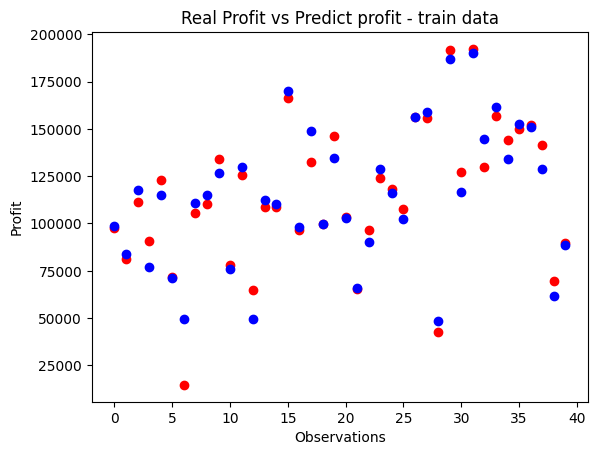

In [14]:
plt.scatter(x=range(0,len(X_train)),y=y_train,color='red')
plt.scatter(x=range(0,len(X_train)),y=regressor.predict(X_train),color='blue')
plt.title("Real Profit vs Predict profit - train data")
plt.xlabel("Observations")
plt.ylabel("Profit")
plt.show()

In [18]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_pred),1),y_pred.reshape(len(y_pred),1)),axis=1))

[[105008.31 114664.42]
 [ 96479.51  90593.16]
 [ 78239.91  75692.84]
 [ 81229.06  70221.89]
 [191050.39 179790.26]
 [182901.99 171576.92]
 [ 35673.41  49753.59]
 [101004.64 102276.66]
 [ 49490.75  58649.38]
 [ 97483.56  98272.03]]
